<a href="https://colab.research.google.com/github/SarahSaeedKhan/Tasks/blob/main/Mushroom_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
data = pd.read_csv('/content/mushrooms.csv')

In [ ]:
def label_encode(data, columns):
    result = data.copy()
    encoders = {}
    for column in columns:
        encoder = preprocessing.LabelEncoder()
        result[column] = encoder.fit_transform(result[column])
        encoders[column] = encoder
    return result, encoders


In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data1, encoders1 = label_encode(data,data.columns)
y = data1['class']
X = data1.drop(['class'], axis = 1)


In [ ]:
F_entropy = ExtraTreesClassifier(criterion ='entropy', max_features = 22)
F_Gini = ExtraTreesClassifier(criterion ='gini', max_features = 22)

In [ ]:
F_entropy.fit(X, y)
F_Gini.fit(X, y)

ExtraTreesClassifier(max_features=22)

In [ ]:
feature_importance_entropy = F_entropy.feature_importances_
feature_importance_Gini = F_Gini.feature_importances_

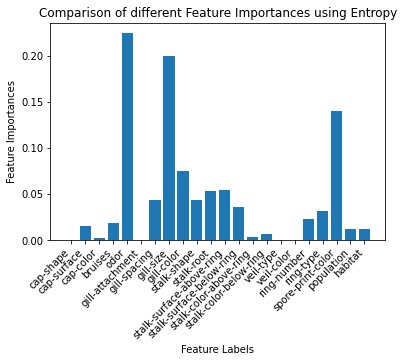

In [ ]:
plt.bar(X.columns, feature_importance_entropy)
plt.xticks(rotation=90, ha='right')


plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances using Entropy')
plt.show()

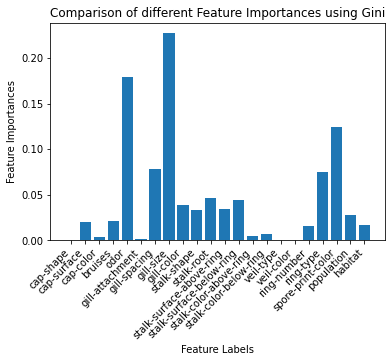

In [ ]:
plt.bar(X.columns, feature_importance_Gini)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances using Gini')
plt.show()
